 1.Import Libraries



In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [3]:

plt.rcParams['figure.dpi'] = 200
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

 2.Read Dataset



In [5]:
df = pd.read_csv(r'C:\Users\khush\OneDrive\Desktop\prediction_heart\heart.csv')
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


 3.Dataset Basic Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Define the continuous features

In [9]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Summary Statistics for Categorical  Variables

In [12]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,1,0,2,1
freq,713,497,872,513,680,482,578,544,526


Step 4 | EDA
4.1 Univariate Analysis
   4.1.1 Numerical\cintinuous Variables Univariate Analysis


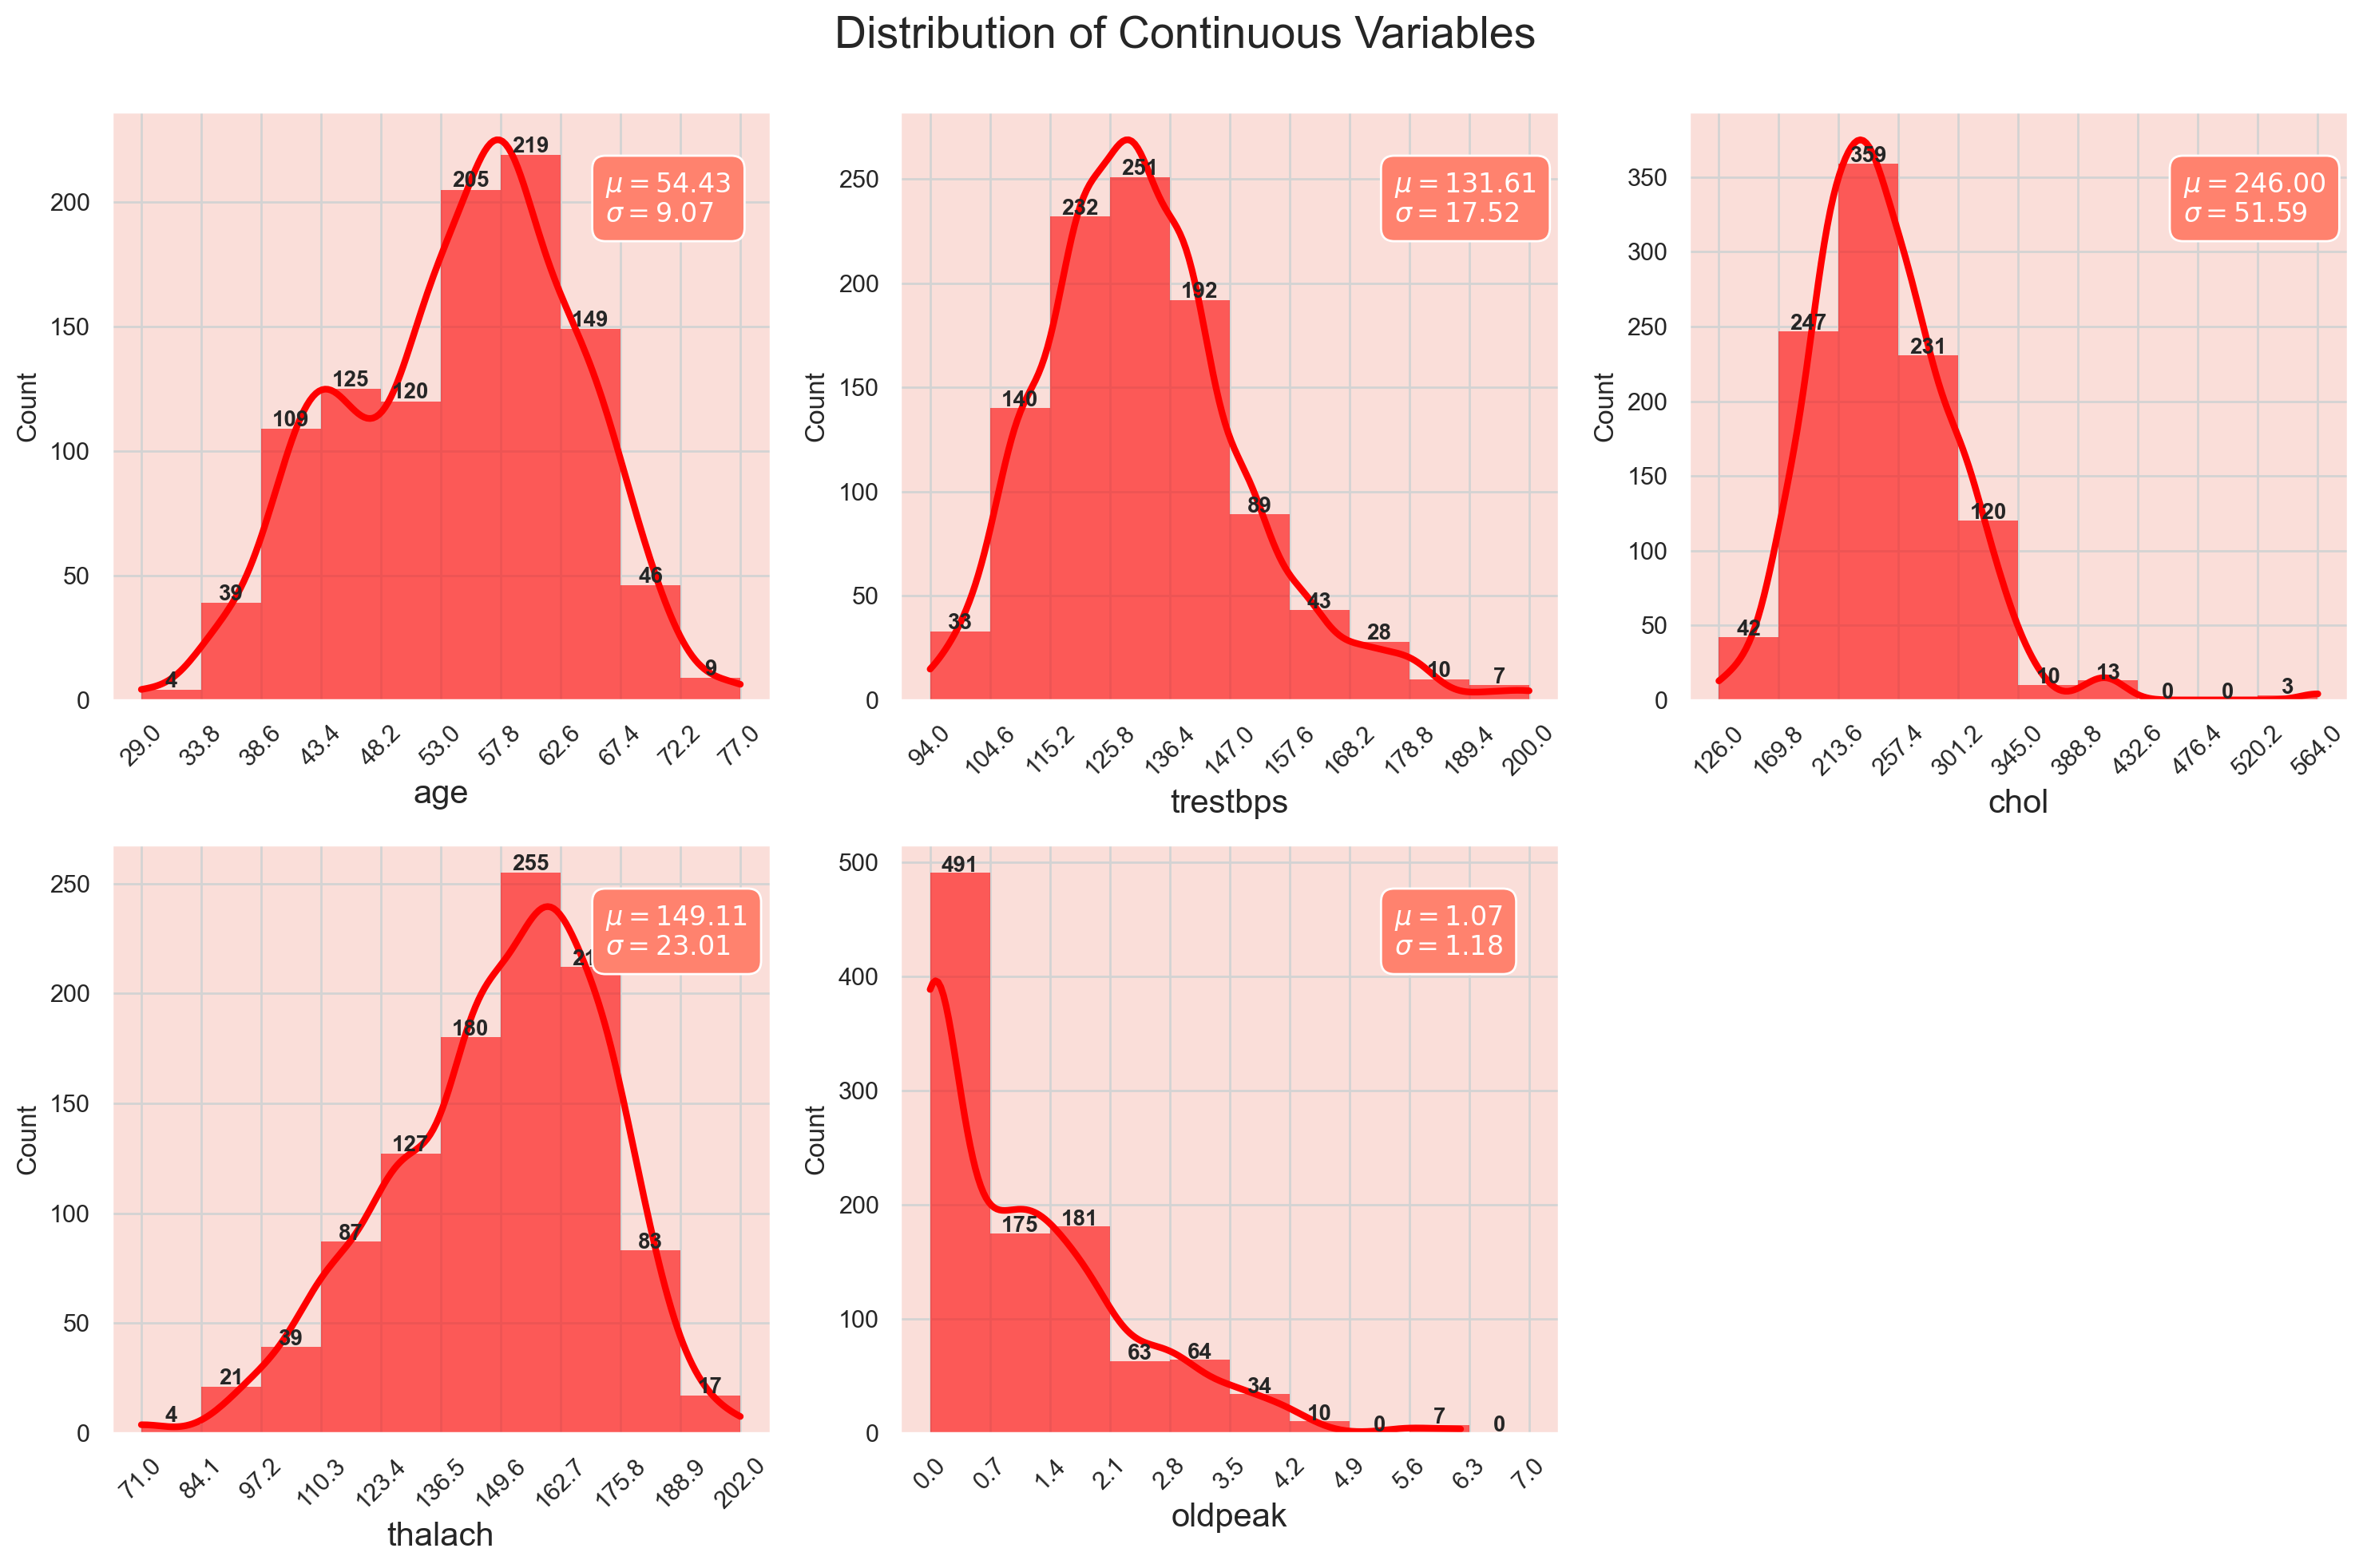

In [14]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

4.2 Bivariate Analysis
  4.2.1  Categorical Variables Univariate Analysis  

In [16]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

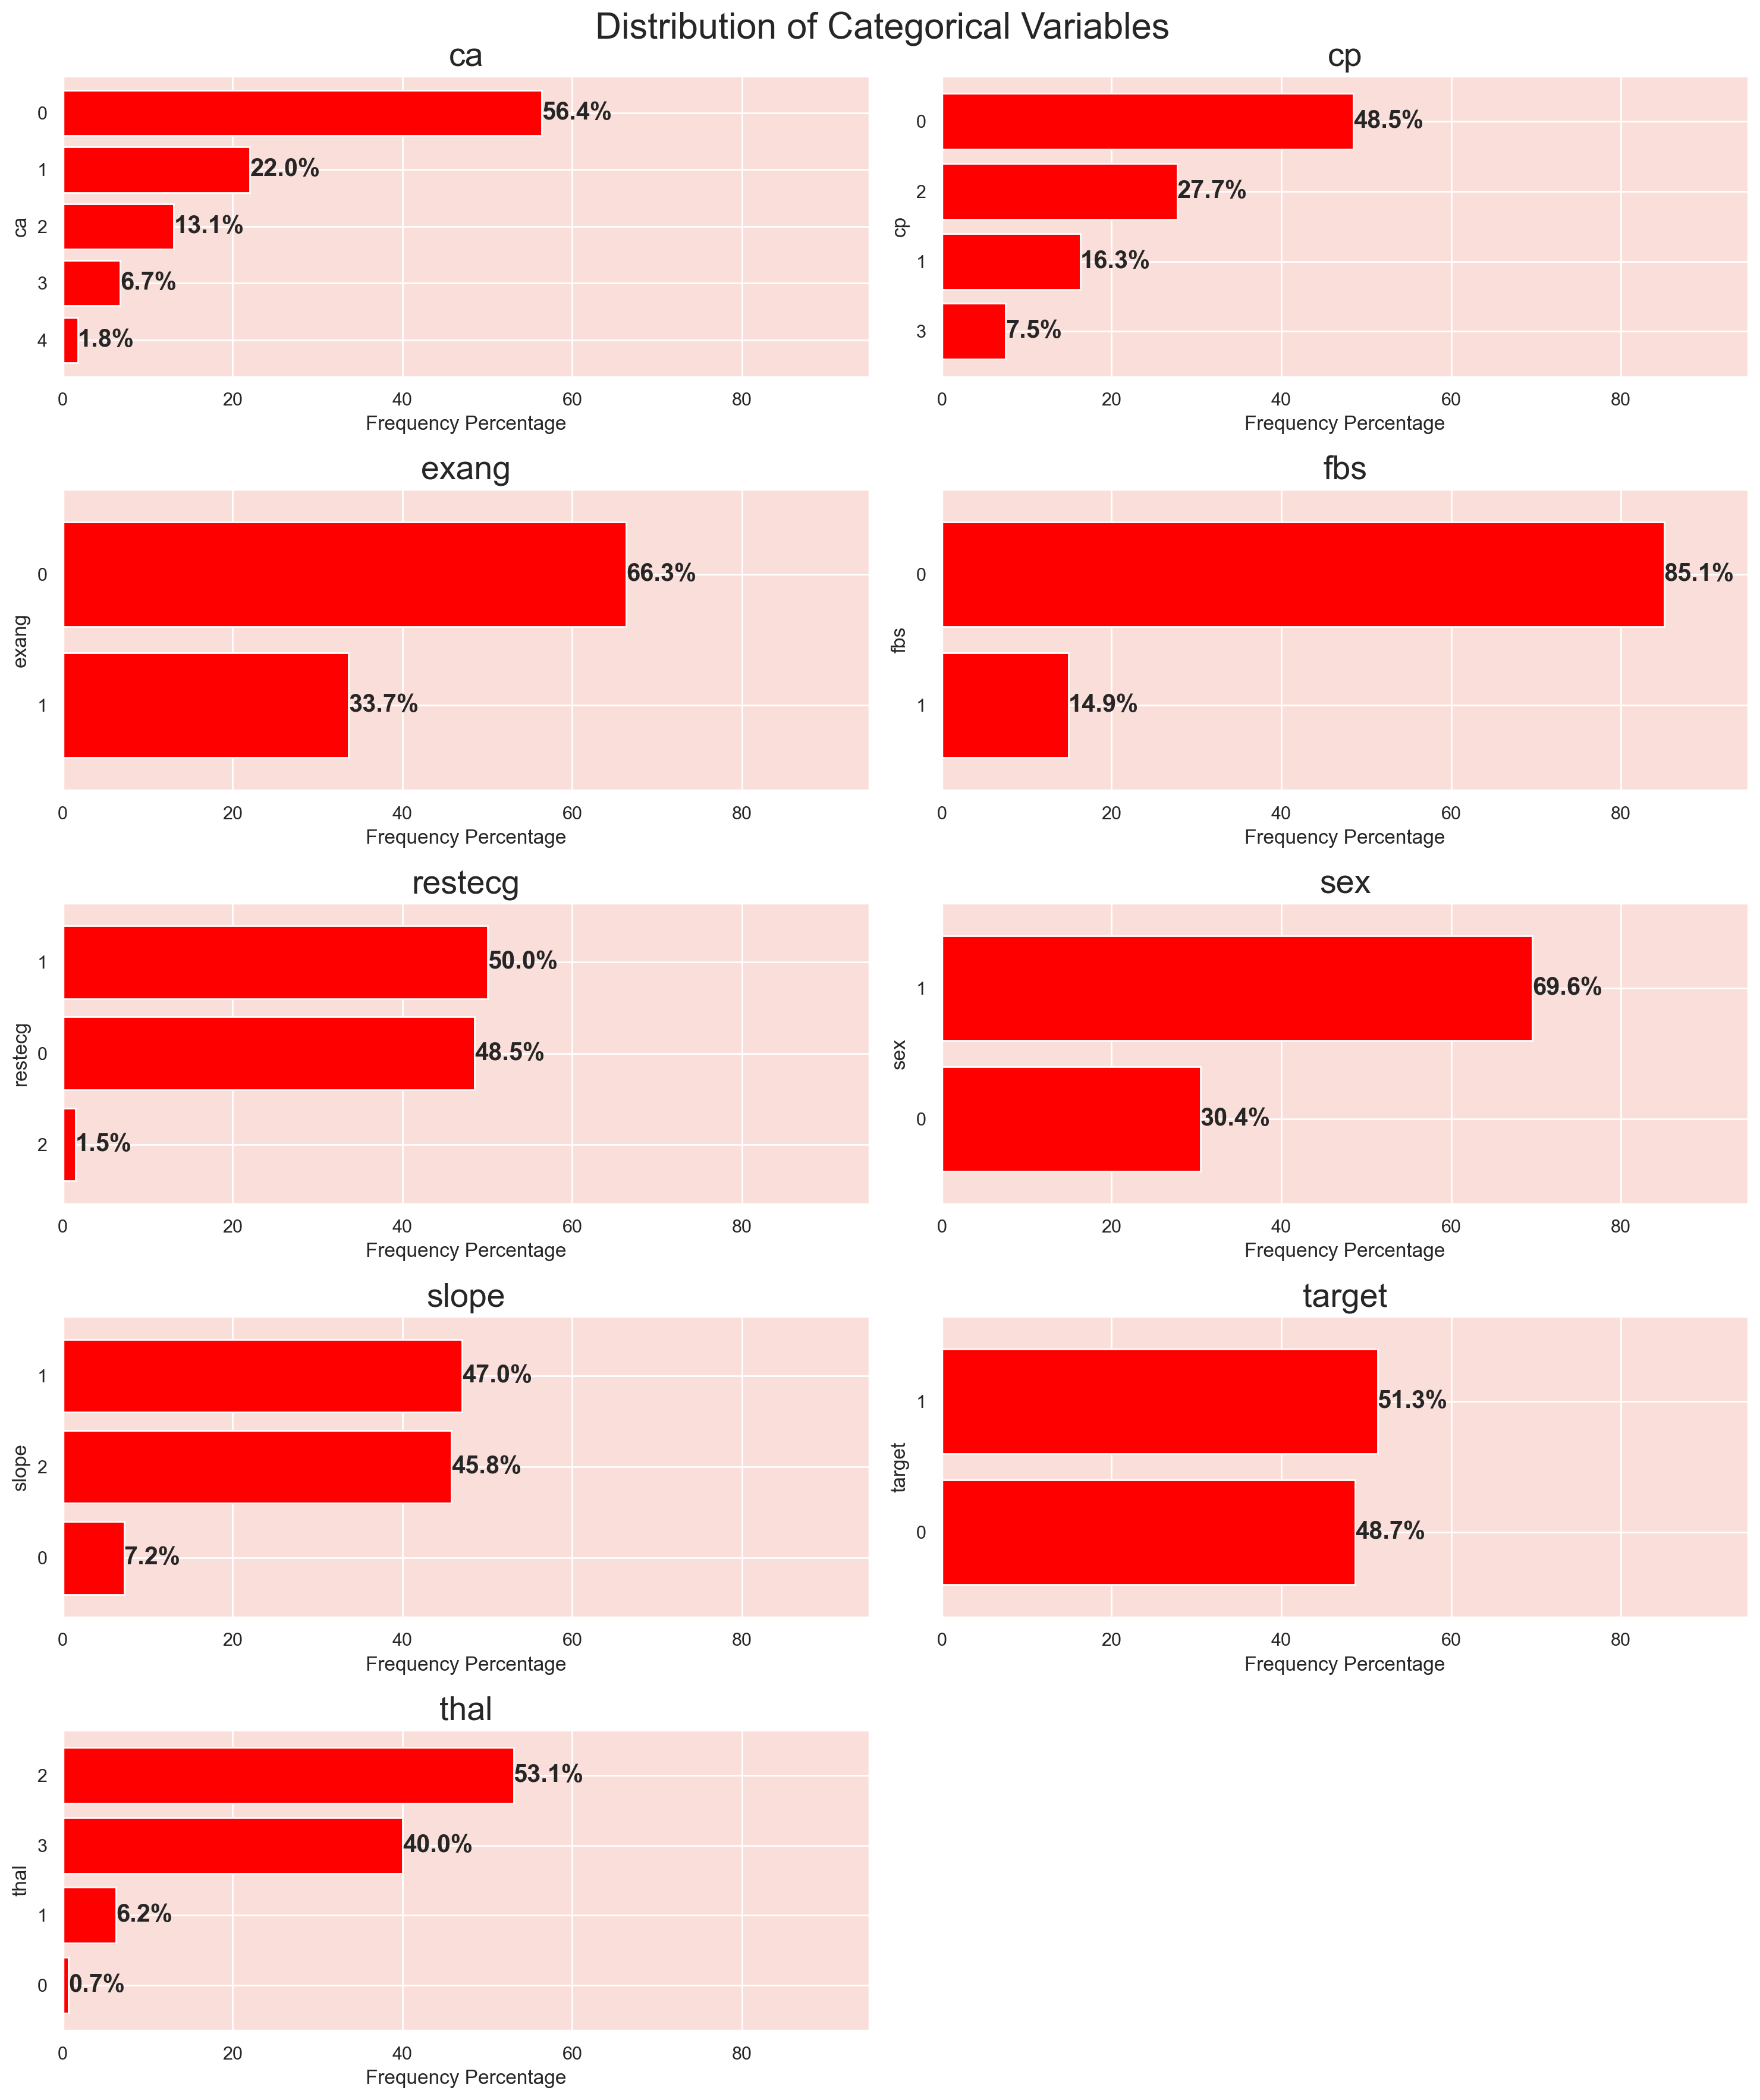

In [17]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

 4.2.2 Numerical Features vs Target 

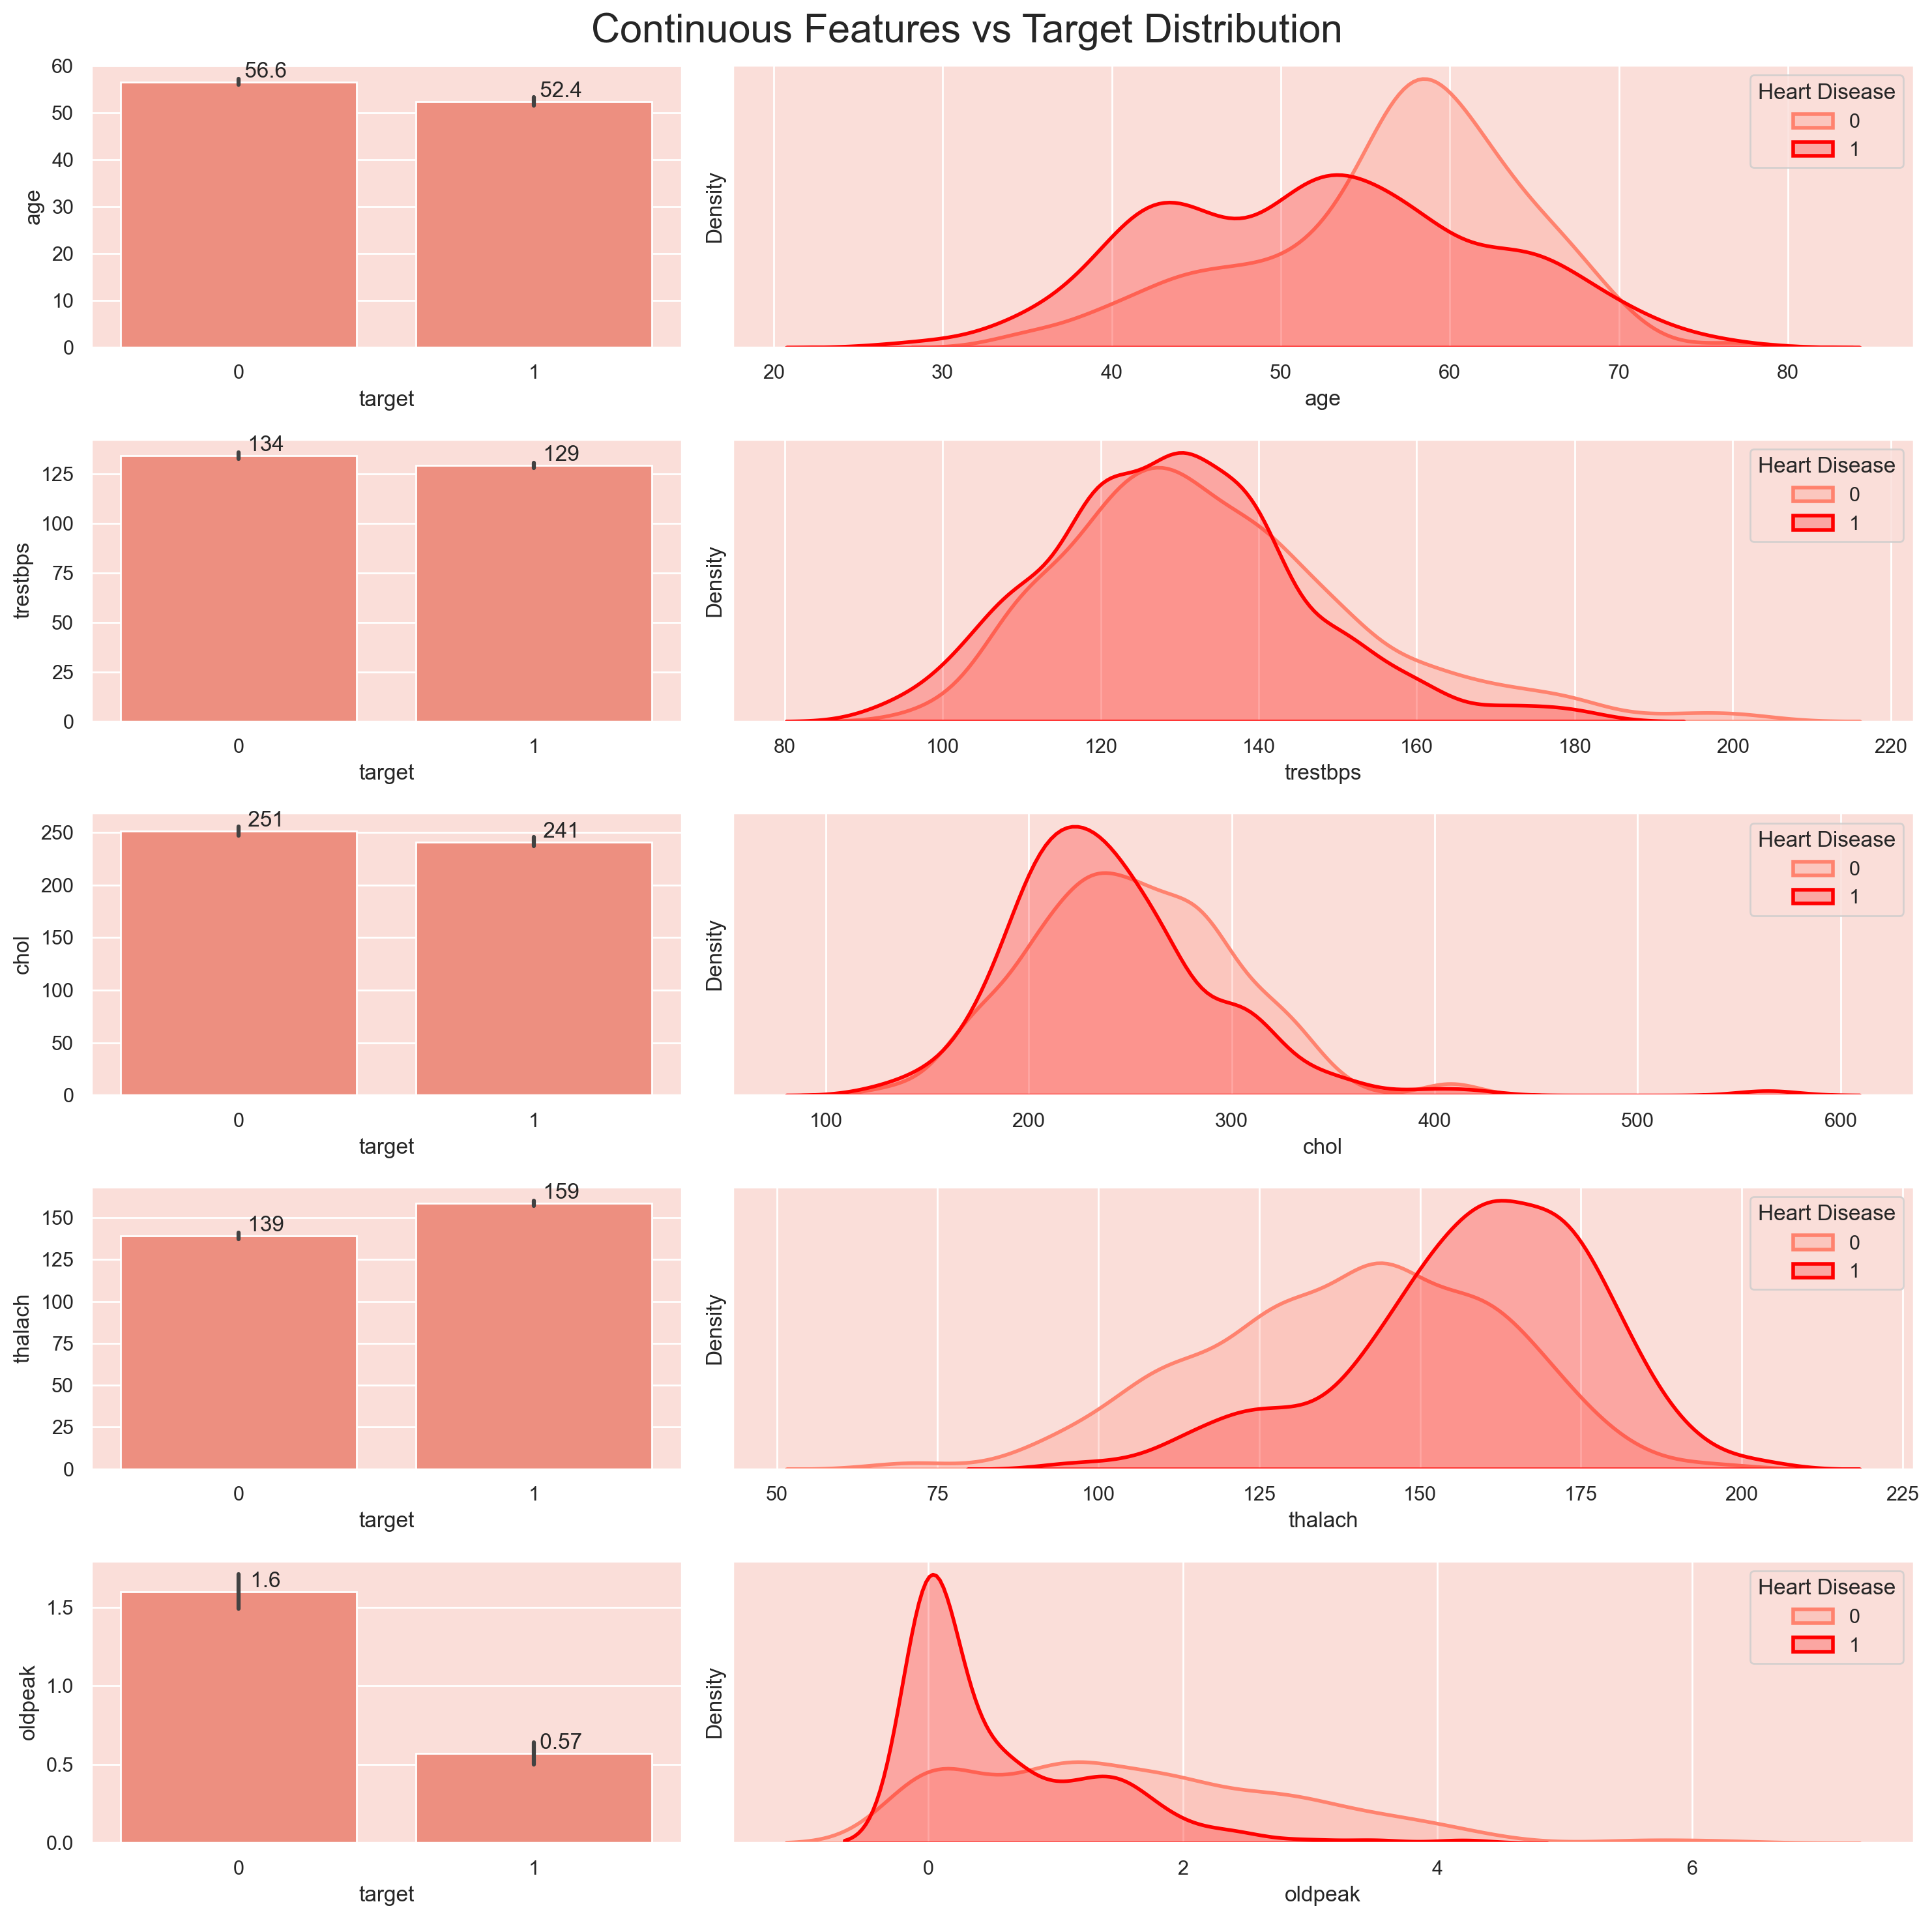

In [19]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()


4.2.3 Categorical Features vs Target

In [21]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

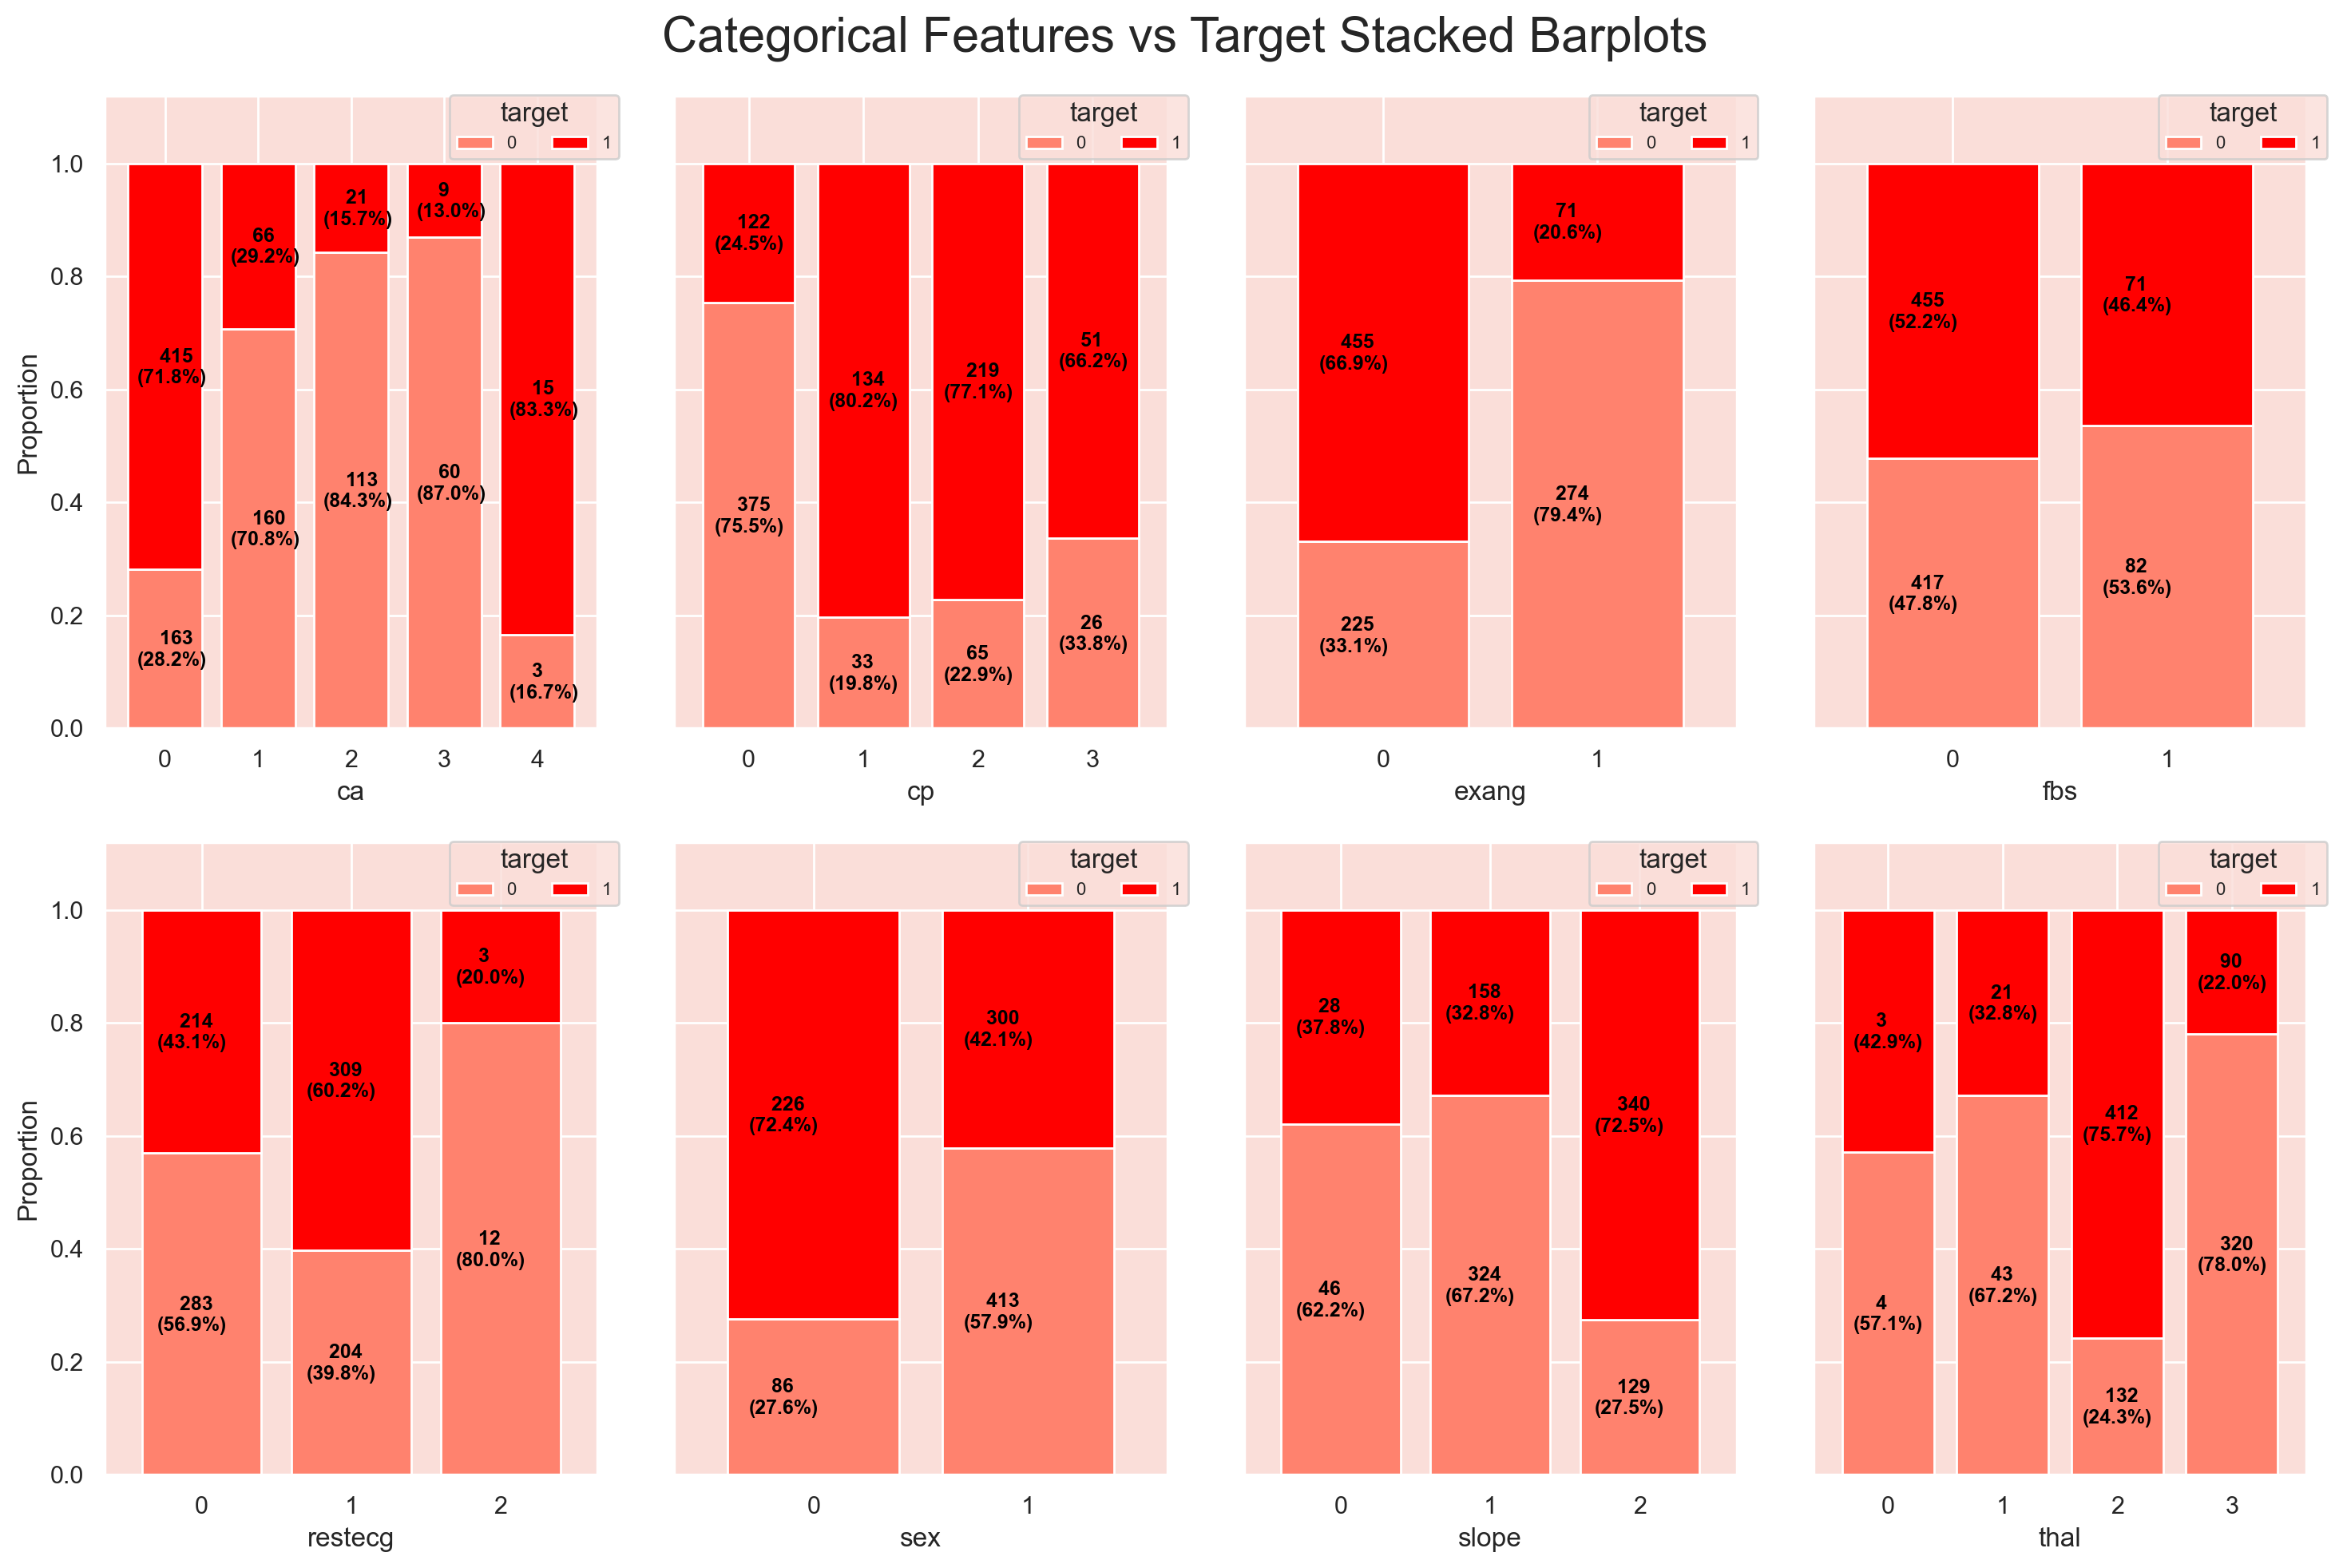

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

5. Data Preprocessing
5.1 Missing Value Treatment

In [24]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

 5.2 Outlier Treatment

In [26]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          0
trestbps    30
chol        16
thalach      4
oldpeak      7
dtype: int64

5.3 Categorical Features Encoding

In [29]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [30]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,False,False,False,True,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,0,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,0,False,False,False,True,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,1,0,False,False,False,True,False,False,False,True
4,62,0,138,294,1,106,0,1.9,1,3,0,False,False,False,True,False,False,True,False


5.4 Feature Scaling

In [32]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] 

In [33]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [34]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [35]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
397,40,1,110,167,0,114,1,2.0,1,0,False,False,False,False,False,False,False,True
687,58,1,125,300,0,171,0,0.0,2,2,False,False,False,False,False,False,False,True
909,50,1,144,200,0,126,1,0.9,1,0,False,False,False,False,False,False,False,True
153,54,1,120,258,0,147,0,0.4,1,0,False,True,False,False,False,False,False,True
373,58,1,120,284,0,160,0,1.8,1,0,True,False,False,False,False,False,True,False


 Convert all `bool` columns to `int

In [37]:

from sklearn.metrics import confusion_matrix

def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(3, 2))  # Smaller plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'],
                annot_kws={"size": 6})  # Smaller annotation text
    plt.xlabel("Predicted", fontsize=6)
    plt.ylabel("Actual", fontsize=6)
    plt.title(f"Confusion Matrix - {model_name}", fontsize=7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()  # Adjust layout to avoid label cutoff
    plt.show()


6.1 DT Base Model Definition

In [39]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

6.2 DT  Hyperparameter Tuning

In [41]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [42]:
    # Hyperparameter grid for DT
    param_grid_dt = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2,3],
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [1, 2]
}

In [43]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [44]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


 6.3 DT Model Evaluation

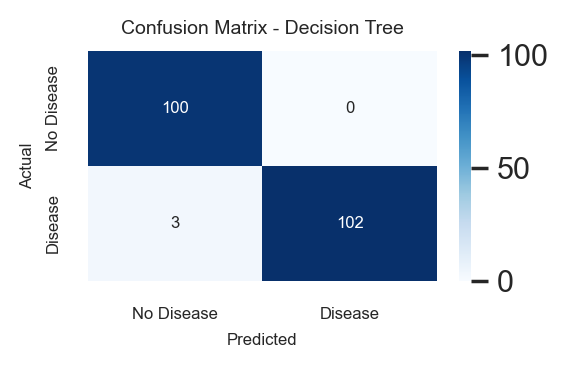

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
plot_confusion(y_test, y_pred_dt, "Decision Tree")


In [47]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       399
           1       0.84      0.85      0.85       421

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



In [48]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       100
           1       0.87      0.90      0.88       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [49]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [50]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.89,0.87,0.86,0.9,0.87,0.88,0.88,0.88,0.88,0.88


Step 7.1  Random Forest Model Building

¶

In [52]:
rf_base = RandomForestClassifier(random_state=0)

1.2 RF Hyperparameter Tuning

In [54]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [55]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


7.3 RF Model Evaluation

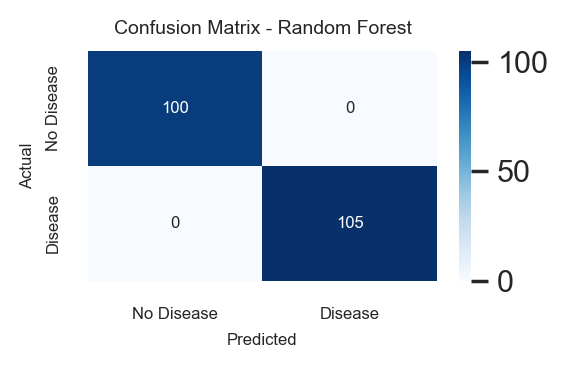

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
plot_confusion(y_test, y_pred_rf, "Random Forest")


In [58]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       399
           1       0.87      0.93      0.90       421

    accuracy                           0.89       820
   macro avg       0.89      0.89      0.89       820
weighted avg       0.89      0.89      0.89       820



In [59]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       100
           1       0.85      0.93      0.89       105

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [60]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.92,0.85,0.83,0.93,0.87,0.89,0.89,0.88,0.88,0.88


8.1 KNN Model Building

In [62]:
# Define the base KNN model and set up the pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [63]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [64]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}


8.3 KNN Model Evaluation

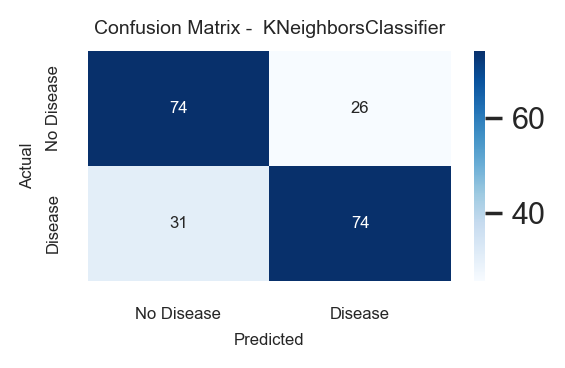

In [66]:
from sklearn.neighbors import  KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
plot_confusion(y_test, y_pred_knn, " KNeighborsClassifier")


In [67]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [68]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [69]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.97,1.0,1.0,0.97,0.99,0.99,0.99,0.99,0.99,0.99


9. SVM Model Building
    9.1 SVM Base Model Definition

In [71]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True)) 
])

9.2  SVM Hyperparameter Tuning

In [73]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  
    'svm__degree': [2, 3, 4]
}

In [74]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


9.3 SVM Model Evaluation

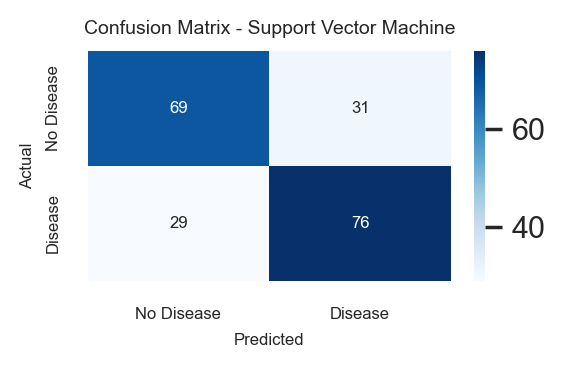

In [76]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
plot_confusion(y_test, y_pred_svm, "Support Vector Machine")


In [77]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       399
           1       0.51      1.00      0.68       421

    accuracy                           0.51       820
   macro avg       0.26      0.50      0.34       820
weighted avg       0.26      0.51      0.35       820



In [78]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.51      1.00      0.68       105

    accuracy                           0.51       205
   macro avg       0.26      0.50      0.34       205
weighted avg       0.26      0.51      0.35       205



In [79]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.0,0.51,0.0,1.0,0.0,0.68,0.26,0.5,0.34,0.51


10.Gradient Boosting base model Difinition

In [81]:
# Gradient Boosting - Pipeline
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

10.1 Hyperparameter grid

In [83]:
# Hyperparameter Grid for GB
gb_param_grid = {
    'gb__n_estimators': [50, 100, 150],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7]
}

In [84]:
# Hyperparameter Tuning for GB
best_gb, best_gb_hyperparams = tune_clf_hyperparameters(gb_pipeline, gb_param_grid, X_train, y_train)
print('GB Optimal Hyperparameters: \n', best_gb_hyperparams)


GB Optimal Hyperparameters: 
 {'gb__learning_rate': 0.01, 'gb__max_depth': 7, 'gb__n_estimators': 50}


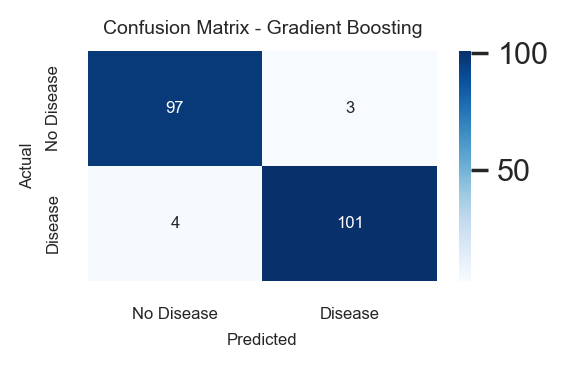

In [85]:
# Confusion Matrix for GB
y_pred_gb = best_gb.predict(X_test)
plot_confusion(y_test, y_pred_gb, "Gradient Boosting")


In [86]:
print(classification_report(y_train, best_gb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       399
           1       0.99      0.99      0.99       421

    accuracy                           0.99       820
   macro avg       0.99      0.99      0.99       820
weighted avg       0.99      0.99      0.99       820



In [87]:
print(classification_report(y_test, best_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.97      0.96      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [88]:
gb_evaluation = evaluate_model(best_gb, X_test, y_test, 'GB')
gb_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
GB,0.96,0.97,0.97,0.96,0.97,0.97,0.97,0.97,0.97,0.97


LR base model difinition

In [90]:
# Logistic Regression - Pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])


In [91]:
# Hyperparameter Grid for LR
lr_param_grid = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__solver': ['liblinear', 'lbfgs'],
    'lr__penalty': ['l1', 'l2']
}

In [92]:
# Hyperparameter Tuning for LR
best_lr, best_lr_hyperparams = tune_clf_hyperparameters(lr_pipeline, lr_param_grid, X_train, y_train)
print('LR Optimal Hyperparameters: \n', best_lr_hyperparams)


LR Optimal Hyperparameters: 
 {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}


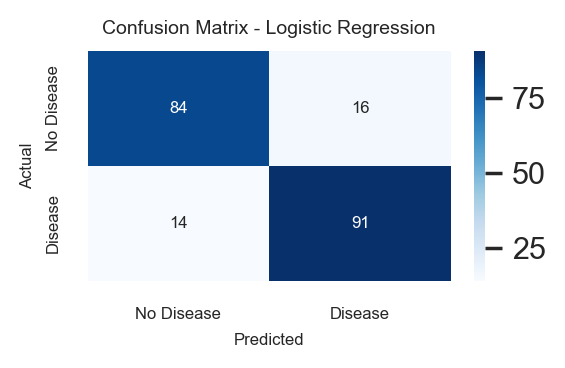

In [93]:
# Confusion Matrix for LR
y_pred_lr = best_lr.predict(X_test)
plot_confusion(y_test, y_pred_lr, "Logistic Regression")


In [94]:
print(classification_report(y_train, best_lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       399
           1       0.84      0.89      0.87       421

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820



In [95]:
print(classification_report(y_test, best_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       100
           1       0.85      0.87      0.86       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [96]:
lr_evaluation = evaluate_model(best_lr, X_test, y_test, 'LR')
lr_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
LR,0.86,0.85,0.84,0.87,0.85,0.86,0.85,0.85,0.85,0.85


 Conclusion

In [98]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation,gb_evaluation,lr_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.00,0.51,0.00,1.00,0.00,0.68,0.26,0.50,0.34,0.51
KNN,0.97,1.00,1.00,0.97,0.99,0.99,0.99,0.99,0.99,0.99
GB,0.96,0.97,0.97,0.96,0.97,0.97,0.97,0.97,0.97,0.97
RF,0.92,0.85,0.83,0.93,0.87,0.89,0.89,0.88,0.88,0.88
DT,0.89,0.87,0.86,0.90,0.87,0.88,0.88,0.88,0.88,0.88
LR,0.86,0.85,0.84,0.87,0.85,0.86,0.85,0.85,0.85,0.85


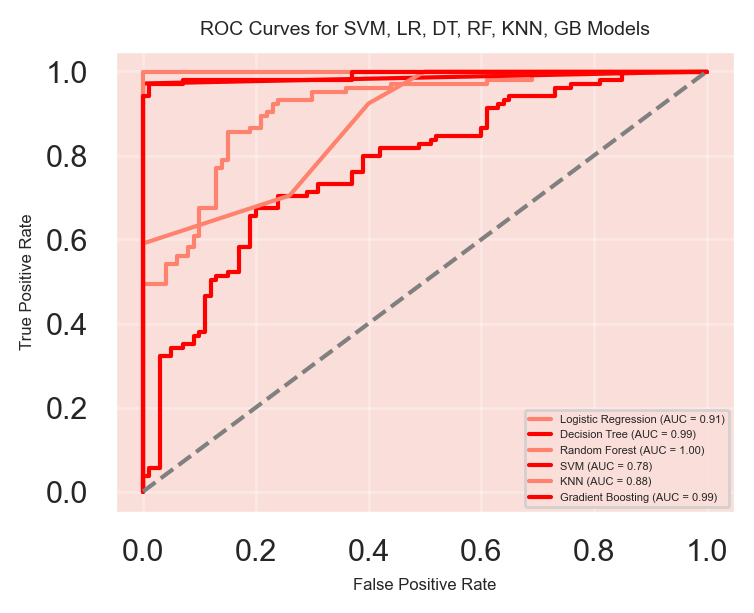

In [99]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

plt.figure(figsize=(4, 3))

# Plot ROC for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate',fontsize=6)
plt.ylabel('True Positive Rate',fontsize=6)
plt.title('ROC Curves for SVM, LR, DT, RF, KNN, GB Models',fontsize=7)
plt.legend(loc='lower right',fontsize=4, title_fontsize=4)
plt.grid(alpha=0.3)
plt.show()


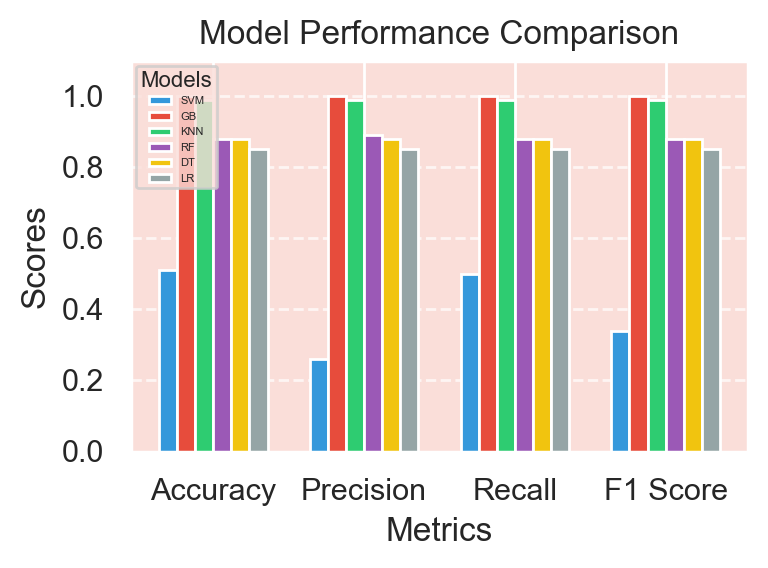

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = {
    'SVM': [0.51, 0.26, 0.50, 0.34],
    'GB': [1.00, 1.00, 1.00, 1.00],
    'KNN': [0.99, 0.99, 0.99, 0.99],
    'RF': [0.88, 0.89, 0.88, 0.88],
    'DT': [0.88, 0.88, 0.88, 0.88],
    'LR': [0.85, 0.85, 0.85, 0.85]
}

categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#95a5a6']

def plot_metrics(metrics):
    models = list(metrics.keys())
    num_metrics = len(categories)
    bar_width = 0.12
    index = np.arange(num_metrics)

    plt.figure(figsize=(4, 3))

    for i, (model, scores) in enumerate(metrics.items()):
        plt.bar(index + i * bar_width, scores, bar_width, label=model, color=colors[i])

    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Model Performance Comparison')
    plt.xticks(index + bar_width * 2.5, categories)
    plt.ylim(0, 1.1)
    plt.legend(title="Models",fontsize=4, title_fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example run
plot_metrics(metrics)


In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Define selected columns
selected_columns = [
    "age", "sex", "trestbps", "chol", "fbs", 
    "thalach", "exang", "oldpeak", "slope", 
    "ca", "thal_1", "thal_2", "thal_3"
]

# Create the selected dataset
X_train_selected = X_train[selected_columns]

# Train Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

# Train Model
model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)

# Save the new scaler and model
joblib.dump(scaler, 'scaler_13_features.joblib')
joblib.dump(model, 'heart_model_13_features.joblib')

print("✅ Model and Scaler saved with 13 features!")


✅ Model and Scaler saved with 13 features!


In [102]:
import tkinter as tk
from tkinter import messagebox
  

# Load new model and scaler
model = joblib.load('heart_model_13_features.joblib')
scaler = joblib.load('scaler_13_features.joblib')


# Input features expected by the model
input_fields = [
    "Age", "Sex (1=Male, 0=Female)", "Chest Pain Type (0-3)", "Resting BP",
    "Cholesterol", "Fasting Blood Sugar (1=True, 0=False)", "Rest ECG (0-2)",
    "Max Heart Rate", "Exercise Angina (1/0)", "Oldpeak", "Slope (0-2)",
    "Ca (0-4)", "Thal (1/2/3)"
]

# Build GUI
root = tk.Tk()
root.title("Heart Disease Predictor")

entries = []
for i, field in enumerate(input_fields):
    tk.Label(root, text=field).grid(row=i, column=0, sticky='w')
    entry = tk.Entry(root)
    entry.grid(row=i, column=1)
    entries.append(entry)

def predict():
    try:
        data = [float(e.get()) for e in entries]
        data_scaled = scaler.transform([data])
        result = model.predict(data_scaled)[0]
        msg = "✅ No Heart Disease" if result == 0 else "⚠️ Heart Disease Detected"
        messagebox.showinfo("Prediction Result", msg)
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

tk.Button(root, text="Check", command=predict).grid(row=len(input_fields), columnspan=2, pady=10)

root.mainloop()
